## Task 1 - Keyword Network Analysis

### 1.1 Weighted Adjacency Matrix

In [50]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import networkx as nx

In [51]:
# Reading data into a dataframe
data = pd.read_csv('/content/drive/MyDrive/FDA /FDA_Project3/keyword_data.csv')
data.head(5)

,Title,Keyword 1,Keyword 2,Keyword 3,Keyword 4,Keyword 5,Keyword 6,Keyword 7,Keyword 8,Keyword 9,Keyword 10,Keyword 11,Keyword 12
0,Feb/03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Meta-Analyses of Financial Performance and Equ...,EQUITY,ORGANIZATIONAL sociology,PERFORMANCE,META-analysis,PSYCHOMETRICS,ORGANIZATIONAL research,FINANCIAL performance,AGENCY theory,ORGANIZATIONAL effectiveness,ORGANIZATIONAL behavior,CORPORATE governance,NaN
3,"Home Country Environments, Corporate Diversifi...",DIVERSIFICATION in industry,BUSINESS planning,PERFORMANCE standards,EMPLOYEES -- Rating of,CORPORATE culture,STRATEGIC planning,ORGANIZATIONAL effectiveness,MANAGEMENT science,MANAGEMENT research,PRODUCT management,NaN,NaN
4,Safeguarding Investments in Asymmetric Interor...,INTERORGANIZATIONAL relations,INTERGROUP relations,BUSINESS communication,INVESTMENTS,SUPPLY chains,KNOWLEDGE management,INTERORGANIZATIONAL networks,CORPORATE governance,GROUP decision making,INTELLECTUAL capital,NaN,NaN


In [52]:
# Removing rows where atleast 2 column values are null 
data = data.dropna(thresh=2) 

# Dropping title column
data = data.drop(['Title'], axis=1)

# Getting column names
cols = list(data.columns)

In [53]:
# Looping over rows to create list of data for each article 
keywords_lst = []
for ind in data.index:
  rows = []
  rows.extend([data['Keyword 1'][ind], data['Keyword 2'][ind], data['Keyword 3'][ind], data['Keyword 4'][ind],
                       data['Keyword 5'][ind], data['Keyword 6'][ind], data['Keyword 7'][ind], data['Keyword 8'][ind],
                       data['Keyword 9'][ind], data['Keyword 10'][ind], data['Keyword 11'][ind], data['Keyword 12'][ind]])
  rows = [x.lower() for x in rows if str(x) != 'nan']
  keywords_lst.append(rows)

In [54]:
# Getting column values for adjacency matrix 
matrix_cols = list(set([j for i in keywords_lst for j in i]))

# Creating adjacency matrix
keywords_df = pd.DataFrame(np.zeros((248, 248)), columns=matrix_cols, index=matrix_cols)

# Weighted adjacency matrix
for lst in keywords_lst:
  for i in lst:
    for j in lst:
      if i != j:
        keywords_df[i][j] += 1

In [55]:
keywords_df.head()

,organizational effectiveness,social networks,violence in the workplace,competitive advantage,strategic business units,capital investments,contagion (social psychology),intellectual capital,corporate image,marketing -- decision making,performance evaluation,organizational sociology,work attitudes,production management,stockholders,teams in the workplace,self-management (psychology),subsidiary corporations -- management,knowledge management,justice,business networks,succession planning,meta-analysis,delegation of authority,job satisfaction,options (finance),human capital,debt,work environment,research & development contracts,executives -- dismissal of,labor turnover,foreign investments,resource management,organizational research,minority stockholders,corporations -- investor relations,business planning,venture capital,labor process,industrial management,stewards,marketing,suppliers,group decision making,product management,corporate governance,human resource accounting,corporations -- valuation,performance,research & development,product information management,social status,employee loyalty,creative ability in business,labor economics,business models,new products,boards of directors,business enterprises -- valuation,organizational commitment,employee stock options,customer services,mass media,transaction costs,eminent domain,individual differences,customer orientation,interorganizational relations,stockholders wealth,stocks (finance),stockholders -- attitudes,stock repurchasing,task analysis,human capital -- management,management research,conduct of life,incentives in industry,break-even analysis,social context,job qualifications,industrial relations,equity,executives -- recruiting,ambivalence,problem employees,management styles,cross-cultural differences,division of labor,service industries -- management,investments,"galatea, sea nymph (greek deity)",consolidation & merger of corporations,social exchange,corporations -- finance,personnel management,decision making,risk management in business,workflow,social factors,public companies,employees,work & family,punctuated equilibrium (evolution),industrial efficiency,resource allocation,wages,innovations in business,employee motivation,occupational roles,organizational goals,host countries (business),commercial products,corporate culture,human error,employee ownership,entrepreneurship,labor productivity,business enterprises,personnel changes,conflict management,employee recruitment,labor organizing,compensation management,directors of corporations,family-owned business enterprises,quality of work life,cross-functional teams,decision theory,strategic planning,problem solving,agency theory,goal setting in personnel management,marketing strategy,diversification in industry,united states -- national guard,information resources management,management,industrial psychology,violence,aggression (psychology),capitalists & financiers,multilevel marketing,data mining,organizational change,mathematical statistics,motivation (psychology),globalization,self-perception,social judgment theory (communication),charismatic authority,high technology,risk,industrial organization,profit,financial performance,business communication,critical incident technique,employment in foreign countries,municipal corporations,infrastructure (economics),management information systems,labor supply,job stress,wage payment systems,international business enterprises,customer satisfaction,strategic alliances (business),motion picture authorship,leadership,high technology industries,employees -- attitudes,screenwriters,supervisors,executives,executive succession,capital market,behavioral research,group identity,innovation management,work environment -- psychological aspects,social influence,interpersonal relations,stock ownership,corporations -- public relations,resource-based theory of the firm,technological innovations,success in business,mediation,taiwanese,institutional investors,burnout (psychology),supply chains,interorga

### 1.2 Weighted Network 

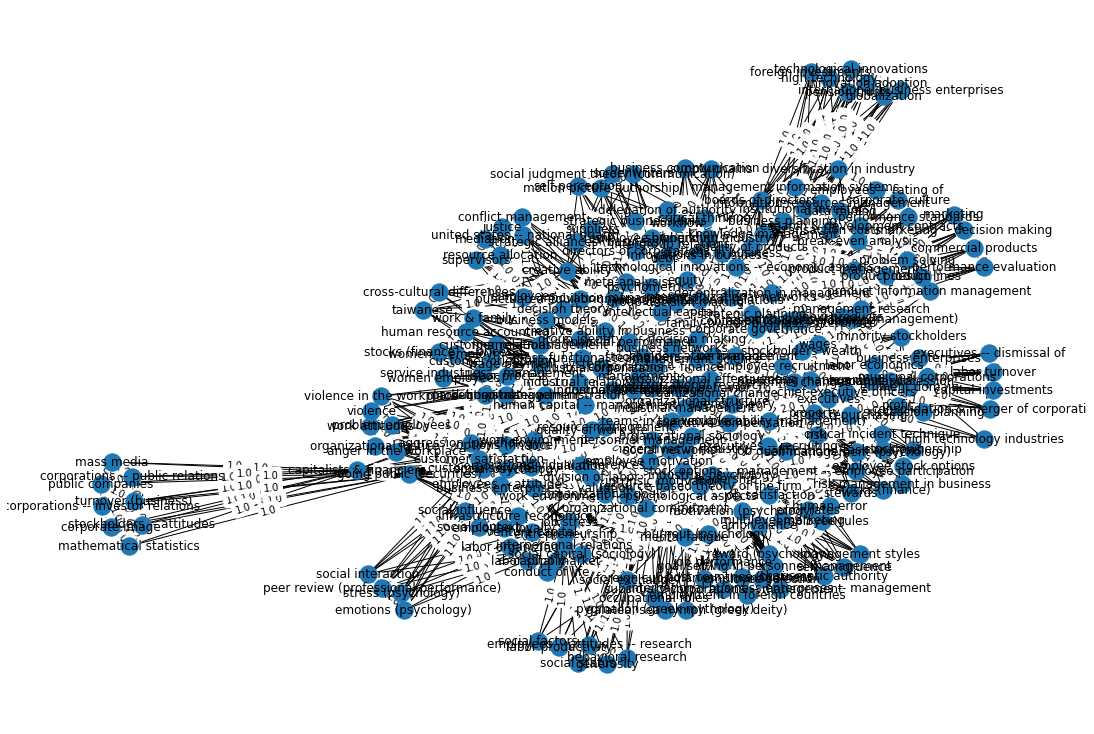

In [298]:
# Creating weighted adjacency network from
graph = nx.from_pandas_adjacency(keywords_df)
layout = nx.spring_layout(graph)
nx.draw(graph, layout, with_labels=True)
labels = nx.get_edge_attributes(graph, "weight")
nx.draw_networkx_edge_labels(graph, pos=layout, edge_labels=labels)
fig = plt.gcf()
fig.set_size_inches(15, 10)
plt.show()

### 1.3 Node Degree and Node Strength

In [74]:
# Computing node degree and strength
degree = [val for node, val in graph.degree()]
strength = [int(val) for node, val in graph.degree(weight='weight')]
degree_strength_df = pd.DataFrame(matrix_cols, columns = ['Node'])
degree_strength_df['Node Degree'] = degree
degree_strength_df['Node Strength'] = strength
degree_strength_df.head()

,Node,Node Degree,Node Strength
0,organizational effectiveness,104,144
1,social networks,21,22
2,violence in the workplace,11,11
3,competitive advantage,37,42
4,strategic business units,10,10


### 1.4 Top 10 Nodes by Degree

In [82]:
# Top 10 nodes by degree
top_degrees = degree_strength_df[['Node', 'Node Degree']]
top_degrees = top_degrees.sort_values(by='Node Degree', ascending=False)
top_degrees.head(10)

,Node,Node Degree
244,organizational behavior,166
0,organizational effectiveness,104
247,management science,102
95,personnel management,93
96,decision making,90
229,organizational structure,74
129,strategic planning,66
11,organizational sociology,66
40,industrial management,64
46,corporate governance,62


### 1.5 Top 10 Nodes by Strength

In [83]:
# Top 10 nodes by strength
top_strengths = degree_strength_df[['Node', 'Node Strength']]
top_strengths = top_strengths.sort_values(by='Node Strength', ascending=False)
top_strengths.head(10)

,Node,Node Strength
244,organizational behavior,265
0,organizational effectiveness,144
247,management science,136
95,personnel management,126
96,decision making,112
229,organizational structure,107
11,organizational sociology,96
46,corporate governance,85
40,industrial management,84
129,strategic planning,80


### 1.6 Top 10 Pairs of Nodes by Weight

In [285]:
# Top 10 pairs of nodes by weight

# Creating a df with pairs of nodes with their weights
top_weights = pd.concat([pd.DataFrame([[i, j, keywords_df[i][j]]], columns=['Node 1', 'Node 2', 'Weight']) 
                        for i in keywords_df for j in keywords_df if keywords_df[j][i] not in top_weights], ignore_index=True)

# Sorting the df by weight values
top_weights = top_weights.sort_values(by='Weight', ascending=False)

In [286]:
top_weights.head()

,Node 1,Node 2,Weight
3994,organizational behavior,organizational effectiveness,11.0
101,organizational effectiveness,organizational behavior,11.0
4147,organizational behavior,organizational structure,9.0
3752,organizational structure,organizational behavior,9.0
1777,personnel management,organizational behavior,8.0


In [287]:
# Dropping duplicates since the previous dataframe has redundant pairs of nodes
top_weights['Weight']=top_weights['Weight'].astype(str)
top_weights = top_weights[['Node 1', 'Node 2', 'Weight']] 
top_weights = top_weights.apply(sorted, axis=1).drop_duplicates()

In [288]:
# Creating a new dataframe with unique pairs of nodes
top_weights = pd.DataFrame(top_weights)
top_weights.head()

,0
3994,"[11.0, organizational behavior, organizational..."
4147,"[9.0, organizational behavior, organizational ..."
1777,"[8.0, organizational behavior, personnel manag..."
4280,"[7.0, management science, organizational behav..."
4059,"[6.0, decision making, organizational behavior]"


In [289]:
# Converting the dataframe into str to clean the values within the column
top_weights = top_weights.astype(str) 

# Renaming the column to Values to perform data cleaning 
top_weights=top_weights.rename(columns= {0: 'Values'})

# Remove square brackets and apostrophes from the values 
top_weights['Values'] = top_weights['Values'].str.strip('[]')
top_weights['Values'] = top_weights['Values'].str.strip("''")

# Splitting the values into three separate columns
top_weights = top_weights.Values.str.split("', '", expand=True)

In [291]:
# Resetting the index and dropping the extra column that gets generated while resetting index
top_weights = top_weights.reset_index()
top_weights = top_weights.drop(top_weights.columns[0],axis = 1)

In [295]:
# Rearranging the order of columns in result dataframe
top_weights = top_weights.iloc[:,[1, 2, 0]].head(10)

In [296]:
# Renaming the names of the columns
top_weights.rename(columns={1: 'Node 1', 2: 'Node 2', 0: 'Weight'})

,Node 1,Node 2,Weight
0,organizational behavior,organizational effectiveness,11.0
1,organizational behavior,organizational structure,9.0
2,organizational behavior,personnel management,8.0
3,management science,organizational behavior,7.0
4,decision making,organizational behavior,6.0
5,organizational behavior,organizational sociology,6.0
6,organizational effectiveness,organizational structure,6.0
7,corporate governance,organizational behavior,6.0
8,organizational sociology,teams in the workplace,5.0
9,management,organizational behavior,5.0


### 1.7 Degree VS. Average Strength Plot 

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


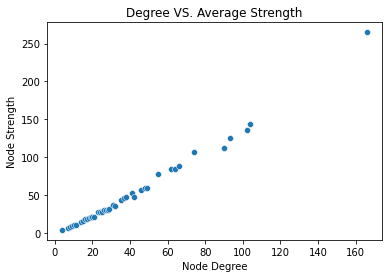

In [323]:
# Plotting Degree VS. Average Strength
plot_df = degree_strength_df[['Node Degree', 'Node Strength']]
plot_df = plot_df.groupby('Node Degree', as_index=False)['Node Strength'].mean()
sns.scatterplot(plot_df['Node Degree'], plot_df['Node Strength']).set(title='Degree VS. Average Strength')
plt.show()